In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

In [4]:
data_df=pd.read_csv('https://raw.githubusercontent.com/Dilum-Alahakoon/AIML-Project/refs/heads/main/data/raw/IT24102770.csv')

In [5]:
display(data_df.head())

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Social_Isolation_Score,Physical_Health_Issues,Average_Salary,Physical_Issue_Count
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,2,Shoulder Pain; Neck Pain,50.0,2
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,2,Back Pain,90.0,1
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,2,Shoulder Pain; Eye Strain,90.0,2
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,2,Shoulder Pain; Eye Strain,70.0,2
4,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,3,Back Pain; Shoulder Pain,70.0,2


In [6]:
categorical_features=data_df.select_dtypes(include=['object']).columns.tolist()

In [7]:
# information about categorical labels
for col in categorical_features:
  print(data_df[col].value_counts())
  print()

Survey_Date
2025-06-23    107
2025-06-16    105
2025-06-07    101
2025-06-21    100
2025-06-18     98
2025-06-05     97
2025-06-12     96
2025-06-22     95
2025-06-04     94
2025-06-03     92
2025-06-15     92
2025-06-14     90
2025-06-17     89
2025-06-06     89
2025-06-08     89
2025-06-19     88
2025-06-25     88
2025-06-02     88
2025-06-11     86
2025-06-13     86
2025-06-20     85
2025-06-09     83
2025-06-26     82
2025-06-01     81
2025-06-24     81
2025-06-10     76
Name: count, dtype: int64

Gender
Male                 1137
Female               1136
Non-binary             64
Prefer not to say      21
Name: count, dtype: int64

Region
South America    430
Africa           415
Asia             403
Oceania          377
Europe           370
North America    363
Name: count, dtype: int64

Industry
Professional Services    557
Technology               436
Finance                  277
Manufacturing            268
Education                203
Healthcare               190
Marketing   

Now we have to choose categorical columns for encode using onehot encoding and label encoding

In [8]:
one_hot_columns=['Physical_Health_Issues','Work_Arrangement','Job_Role','Region','Gender']
label_columns=['Burnout_Level']

In [9]:
# importing onehot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(sparse_output=False)

In [10]:
# fitting the data to onehot encoder
onehot.fit(data_df[one_hot_columns])

OneHotEncoder(sparse_output=False)

In [11]:
# transform the data
transformed_onehot_data=onehot.transform(data_df[one_hot_columns])

In [12]:
# dropping the onehot columns from the origianl dataset
data_df.drop(one_hot_columns,axis=1,inplace=True)

In [13]:
# Get feature names from onehot.categories_
onehot_feature_names = []
for i, col in enumerate(one_hot_columns):
  for cat in onehot.categories_[i]:
    onehot_feature_names.append(f'{col}_{cat}')

# Create a DataFrame from the transformed data
transformed_one_hot_df = pd.DataFrame(transformed_onehot_data, columns=onehot_feature_names, index=data_df.index)

# Concatenate the original DataFrame and the new one-hot encoded DataFrame
data_df = pd.concat([data_df, transformed_one_hot_df], axis=1)

In [14]:
# doing the label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [15]:
data_df.head()

,Survey_Date,Age,Industry,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Social_Isolation_Score,Average_Salary,Physical_Issue_Count,...,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Prefer not to say
0,2025-06-01,27,Professional Services,64,Stress Disorder,High,3,2,50.0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2025-06-01,37,Professional Services,37,Stress Disorder,High,4,2,90.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2025-06-01,32,Education,36,ADHD,High,3,2,90.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2025-06-01,40,Education,63,ADHD,Medium,1,2,70.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2025-06-01,52,Customer Service,61,Burnout,Medium,4,3,70.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


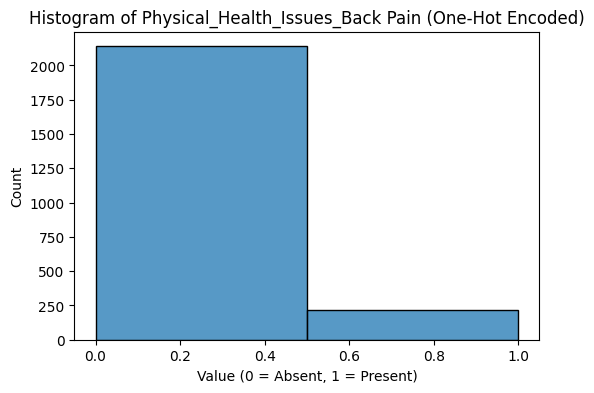

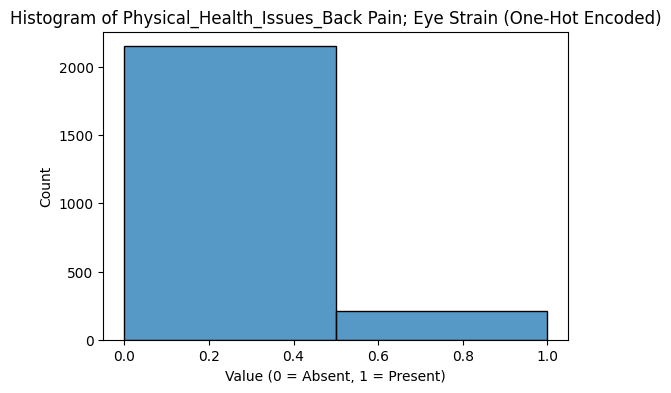

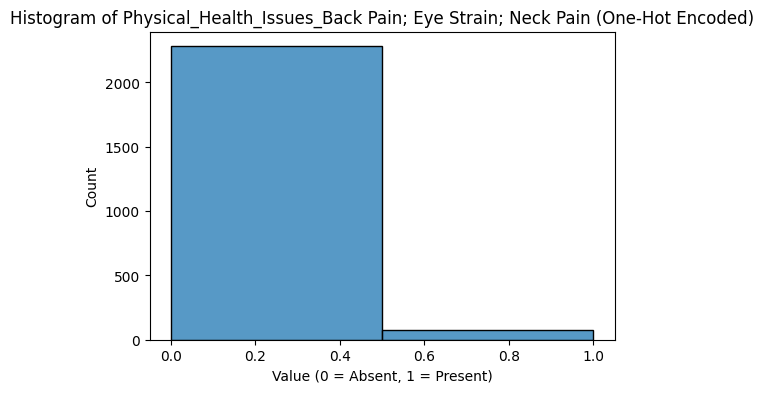

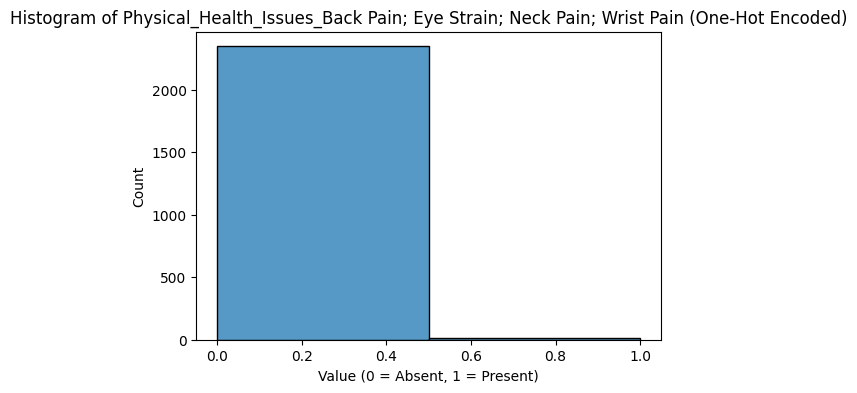

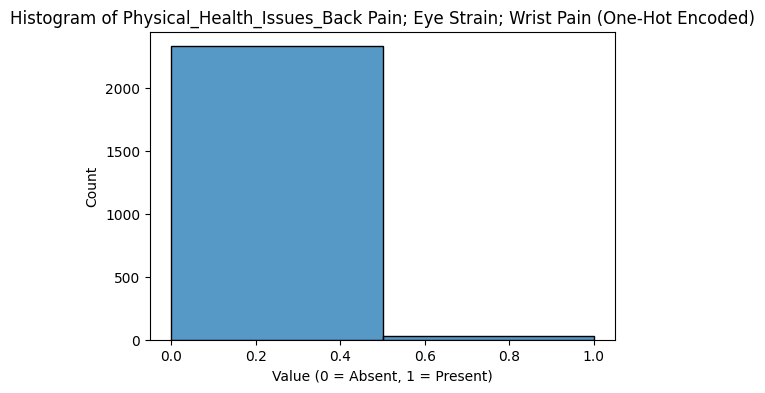

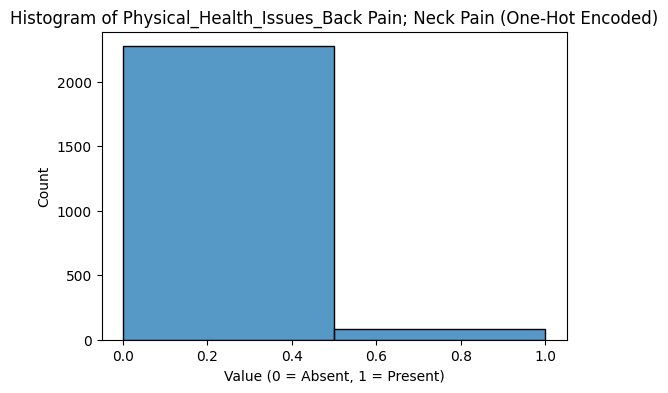

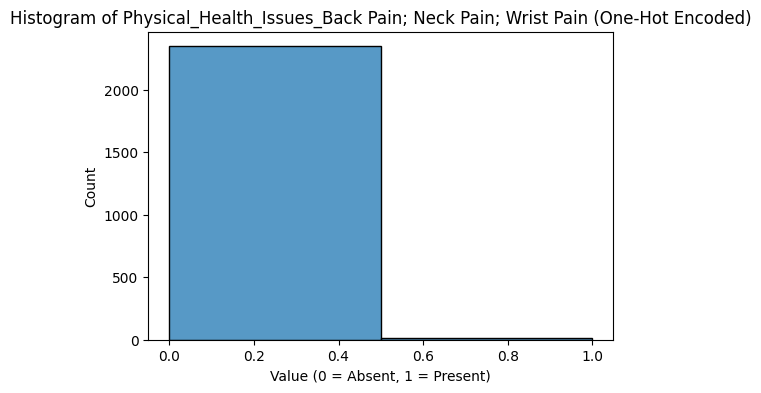

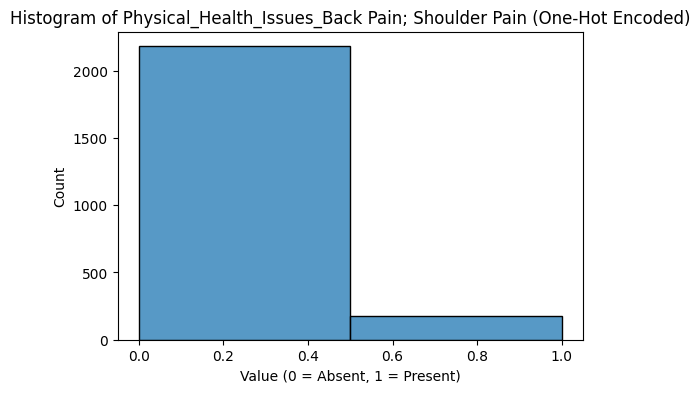

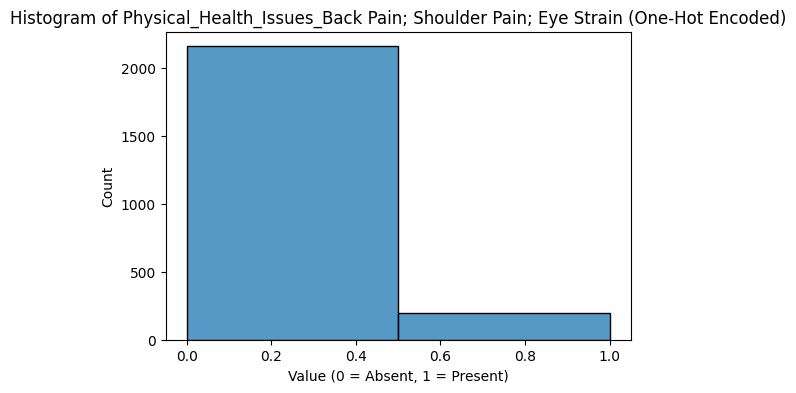

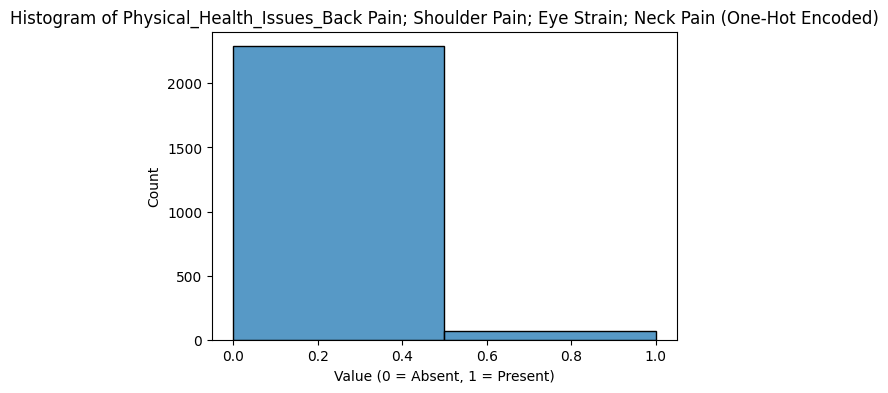

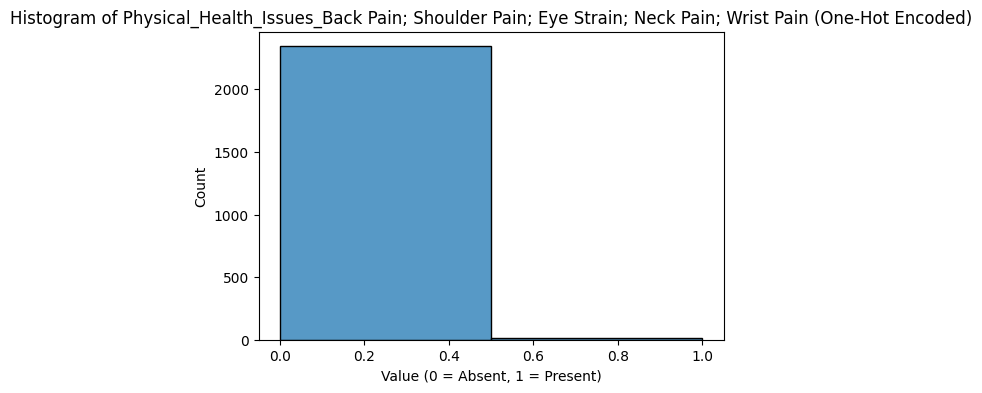

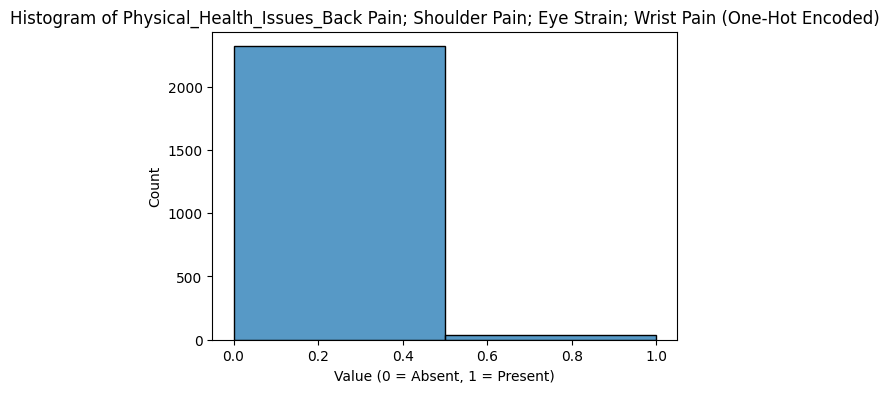

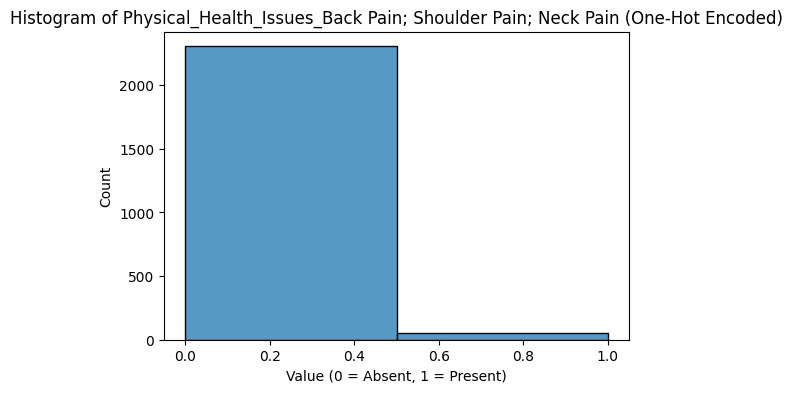

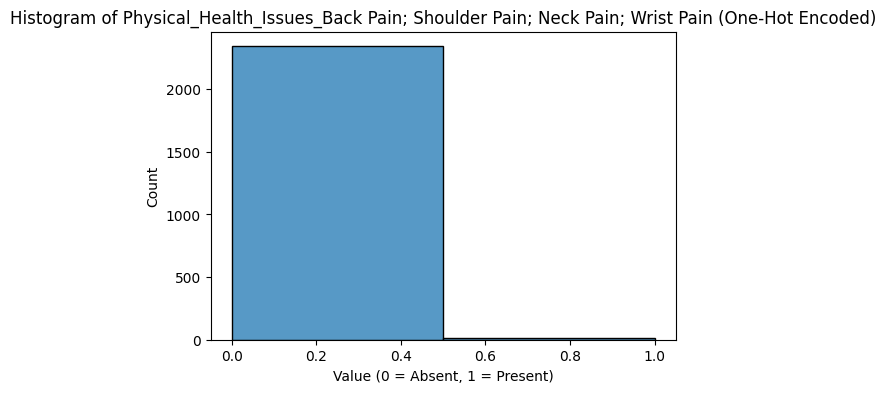

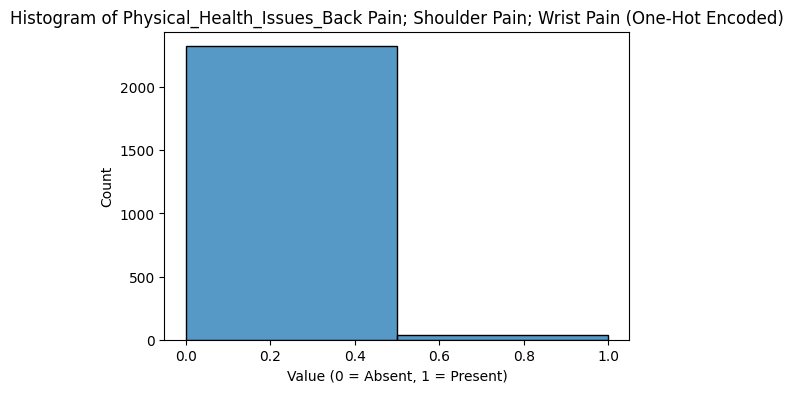

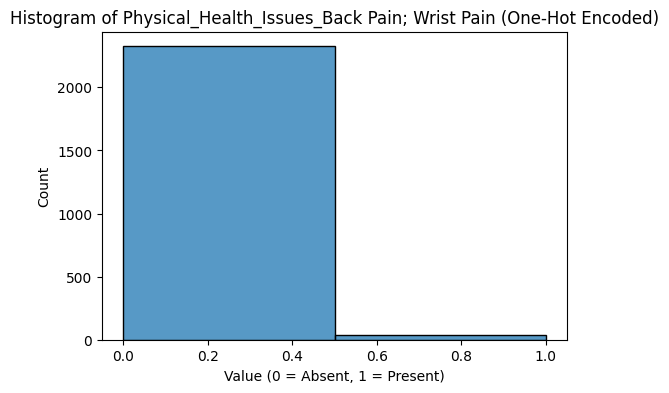

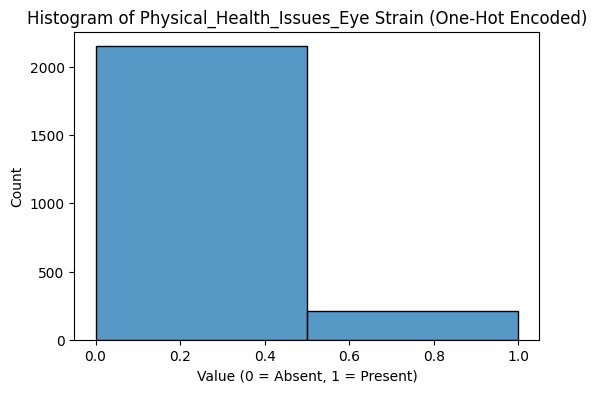

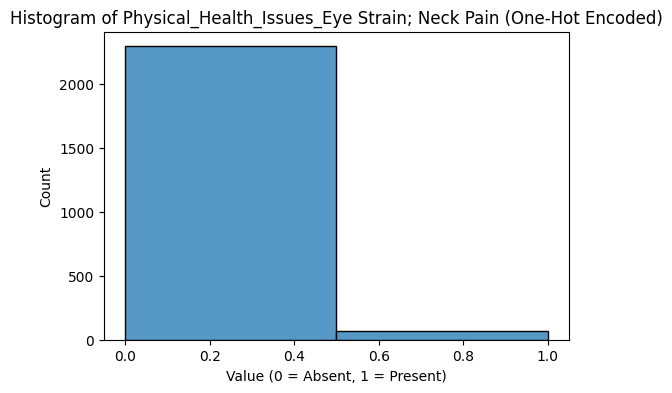

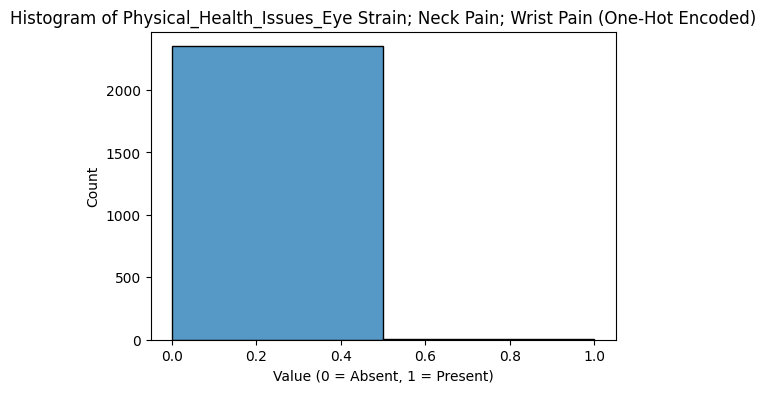

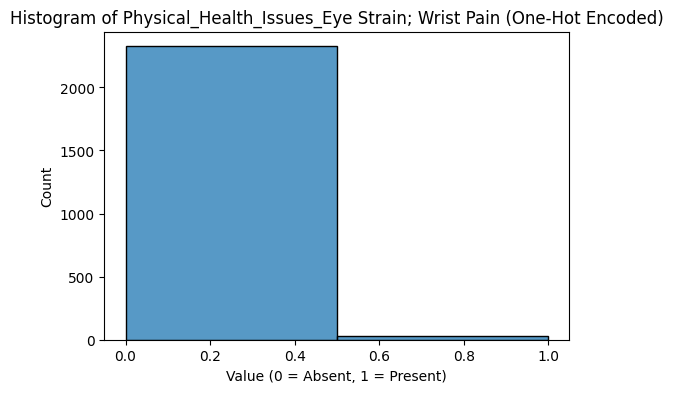

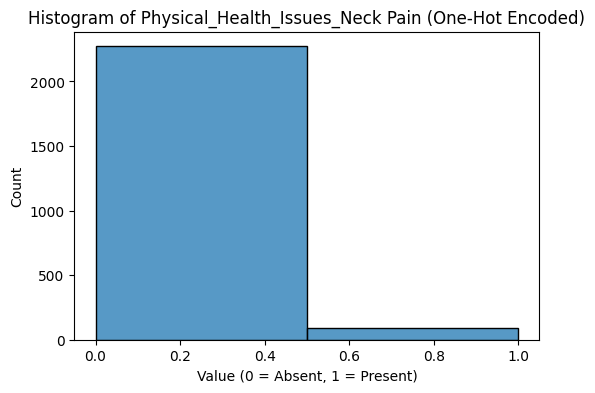

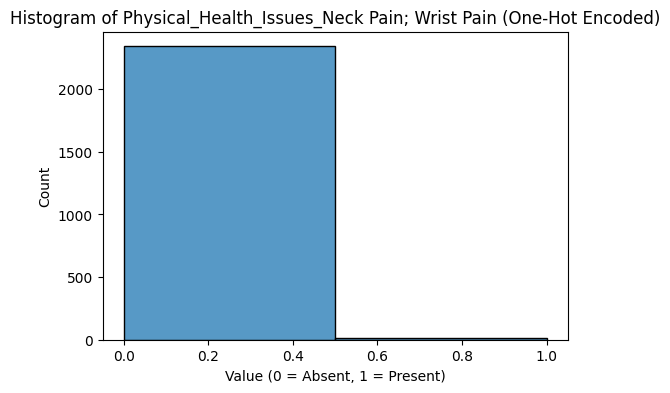

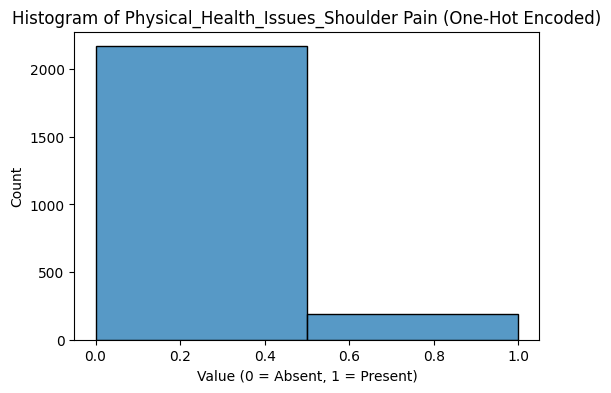

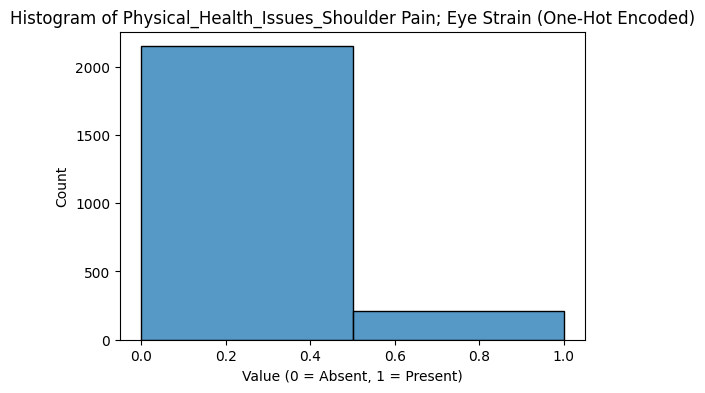

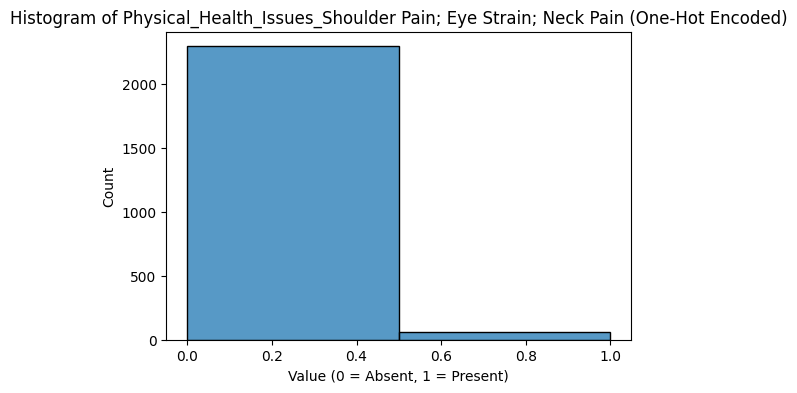

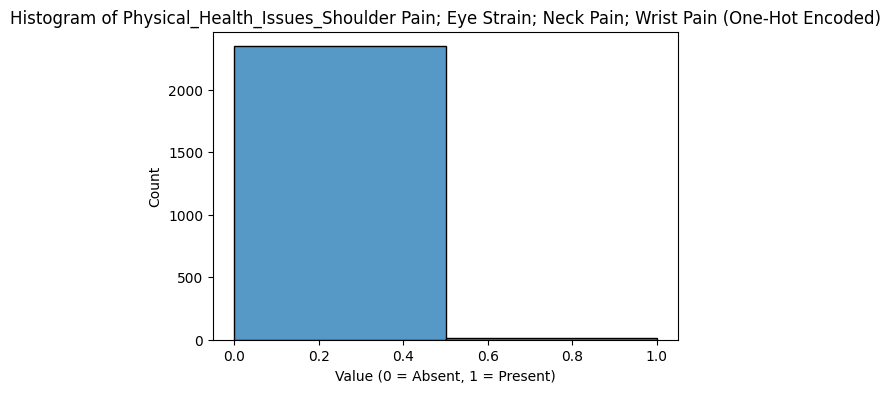

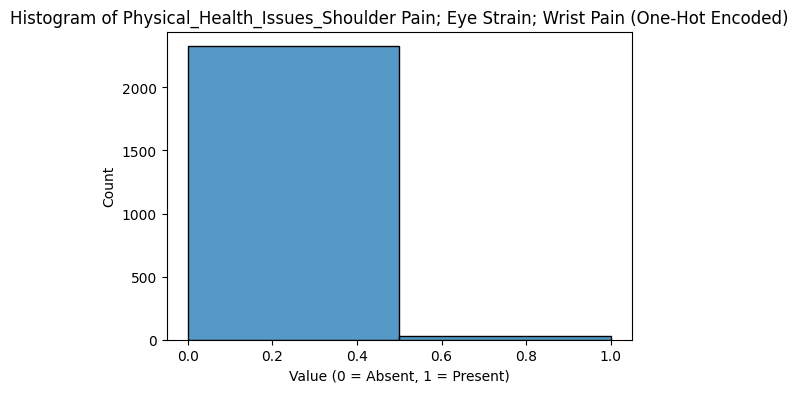

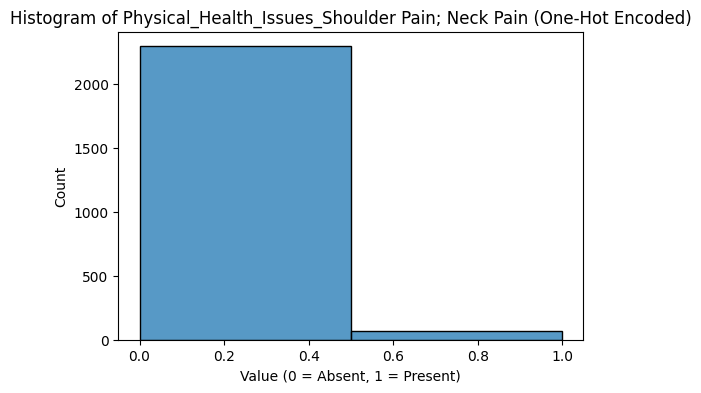

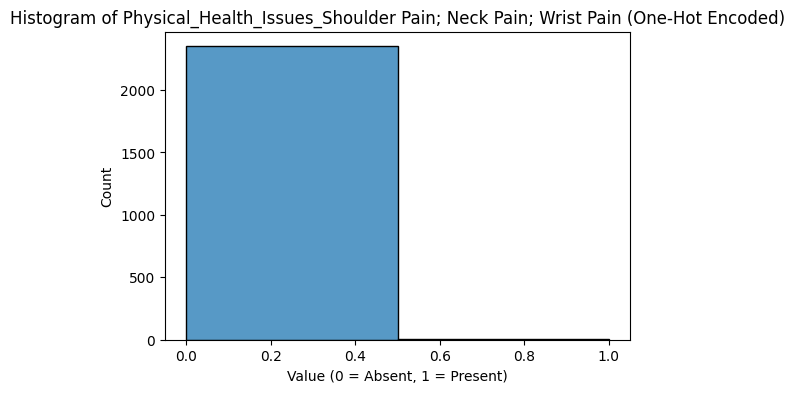

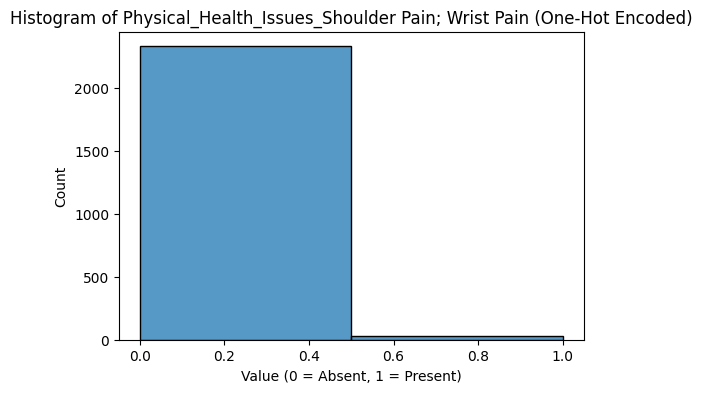

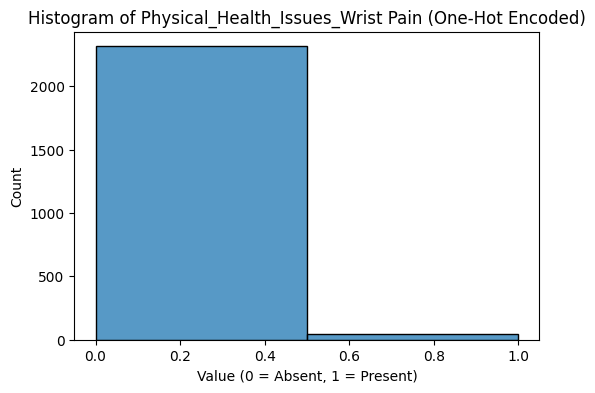

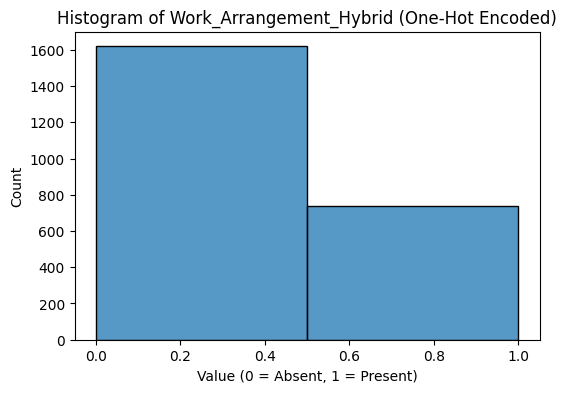

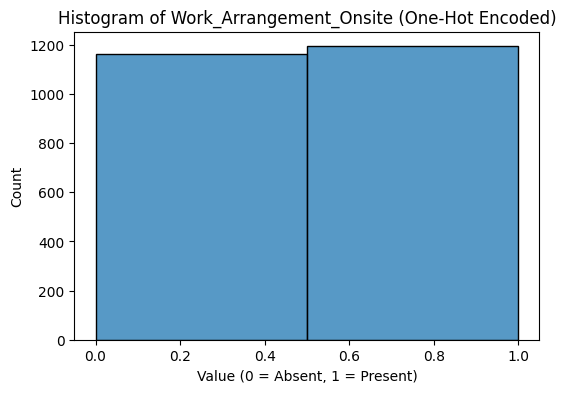

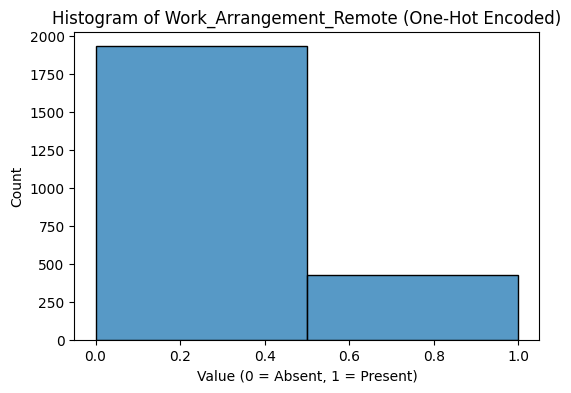

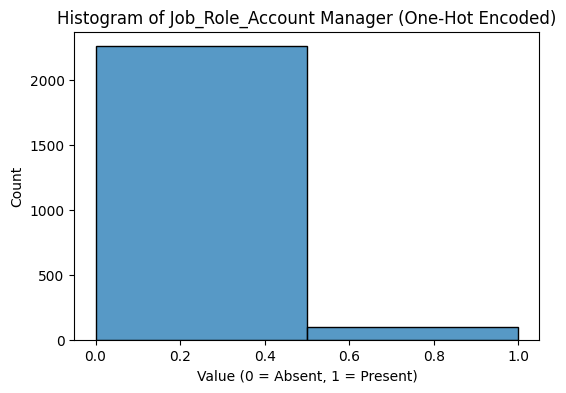

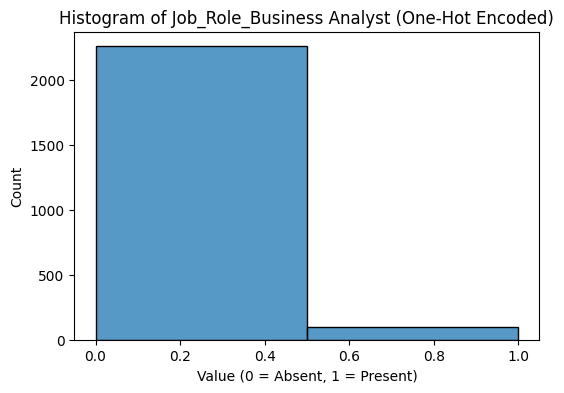

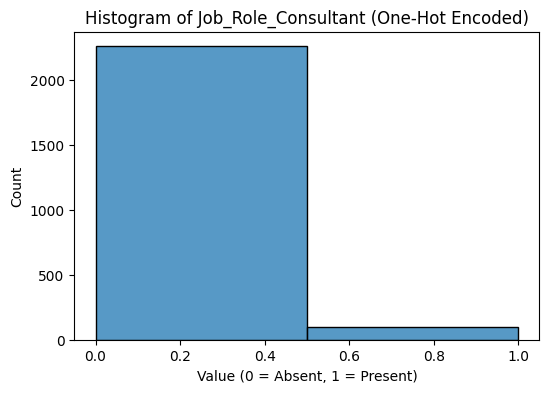

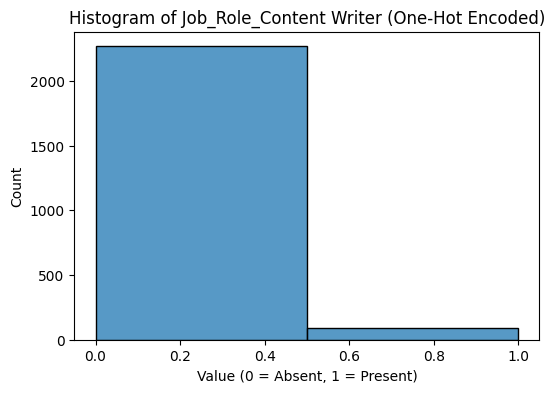

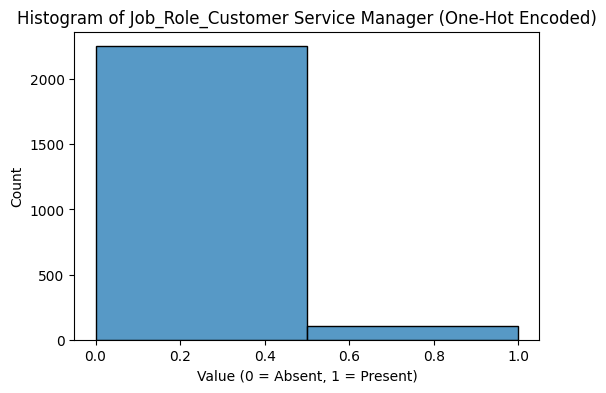

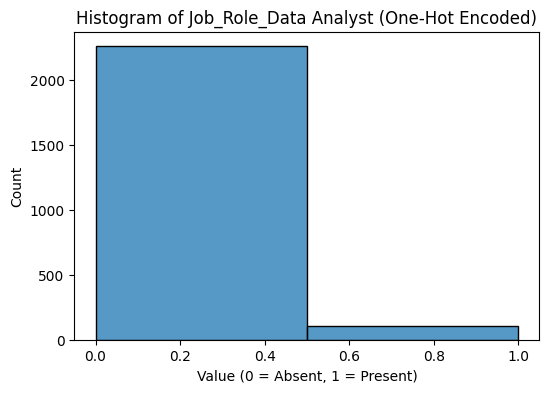

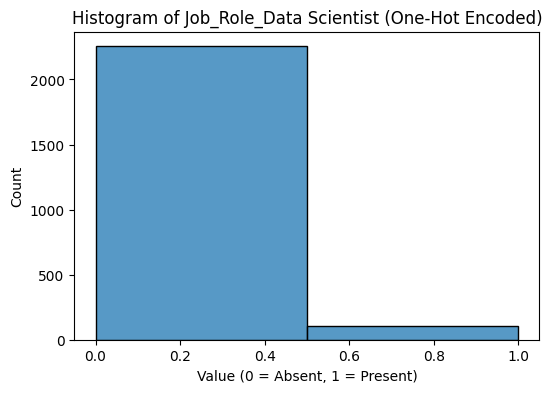

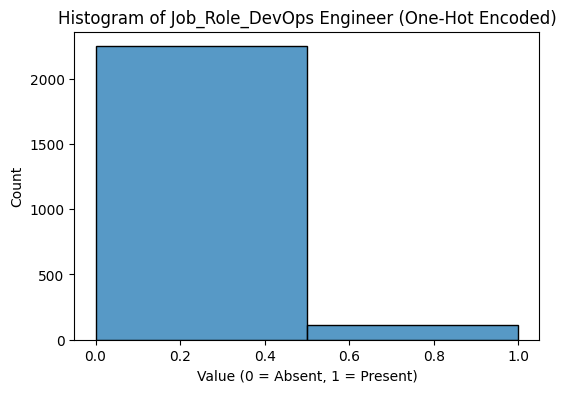

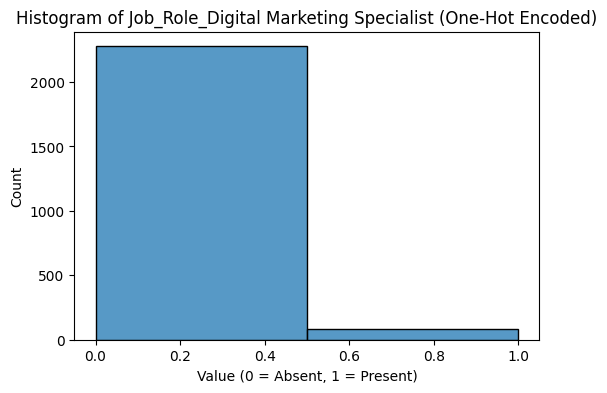

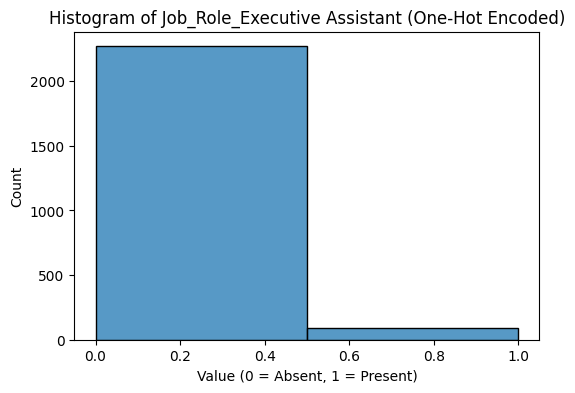

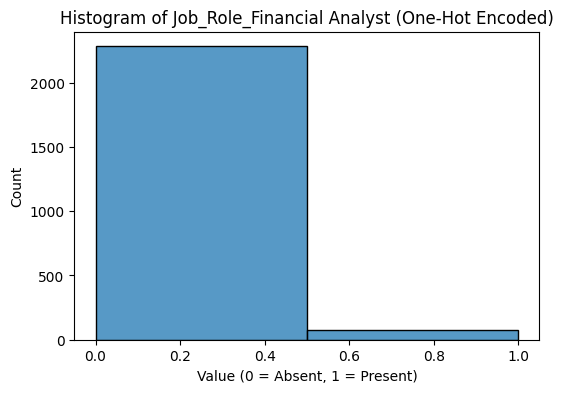

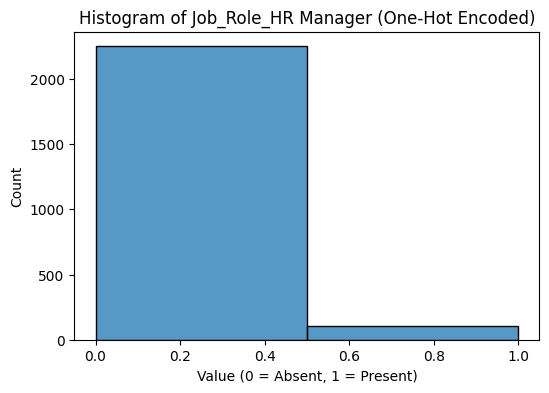

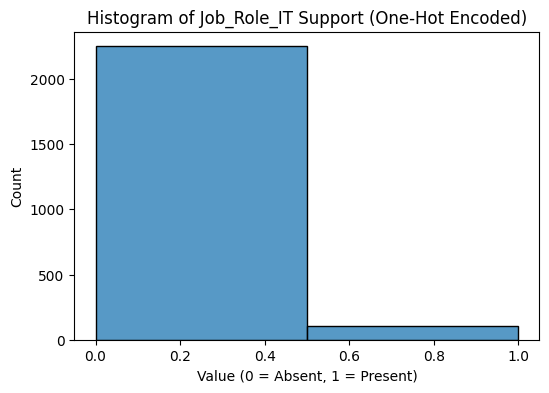

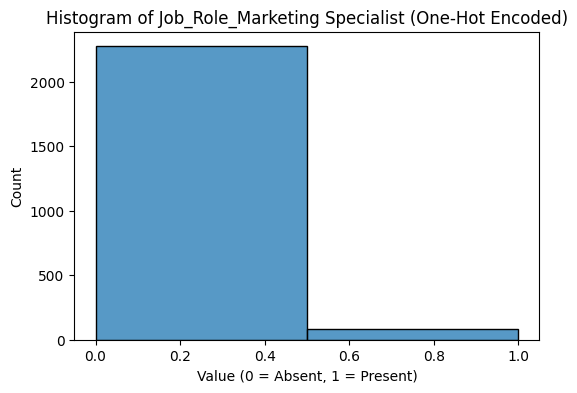

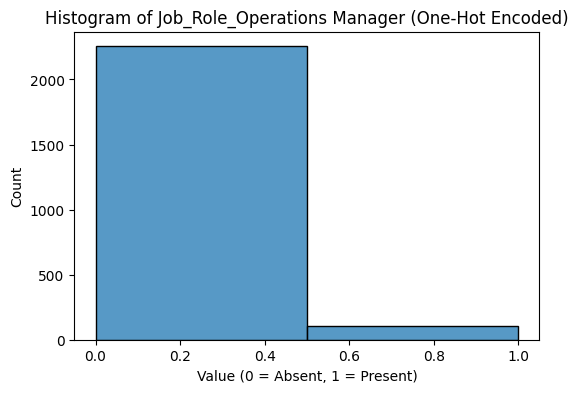

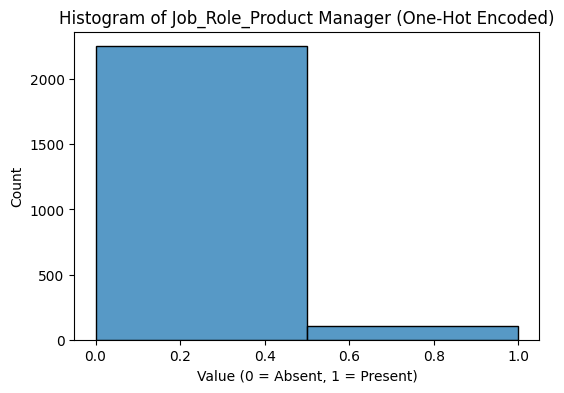

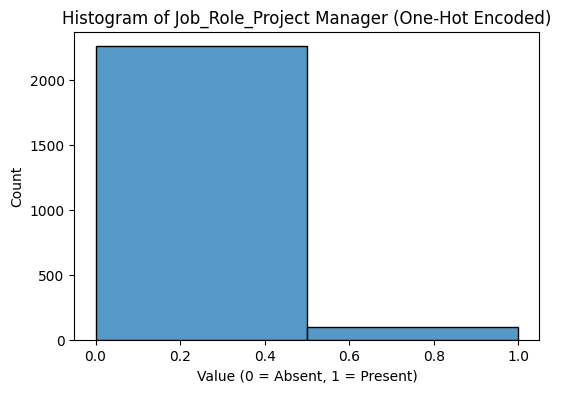

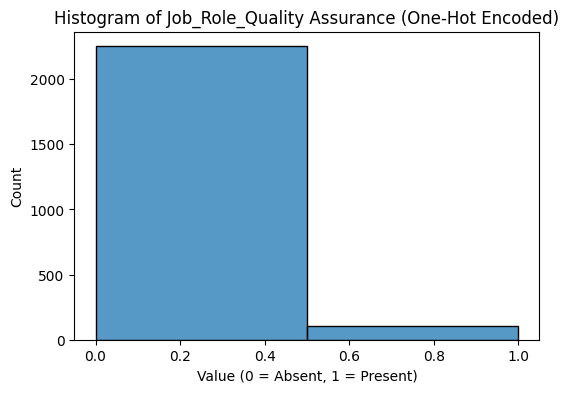

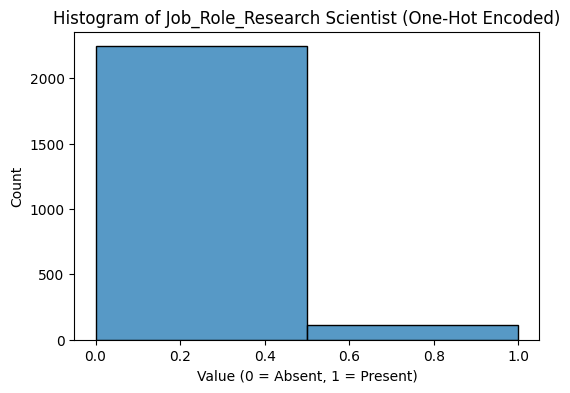

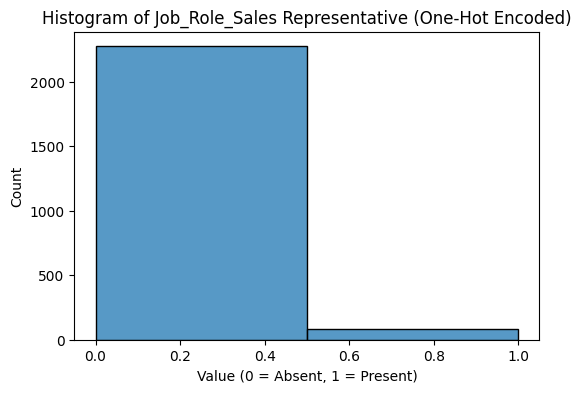

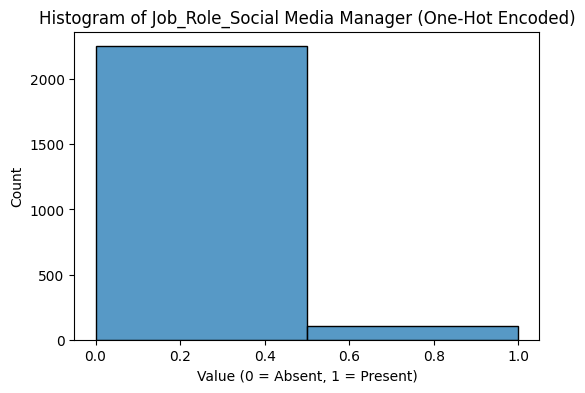

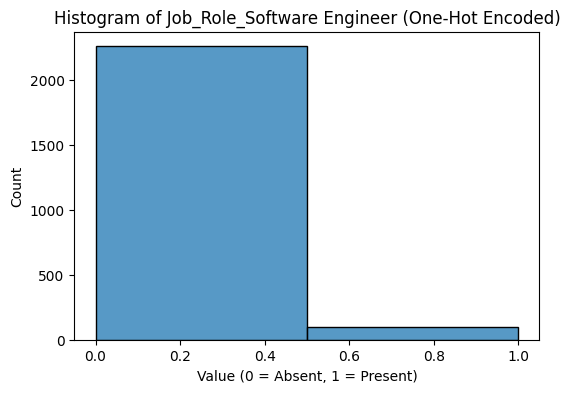

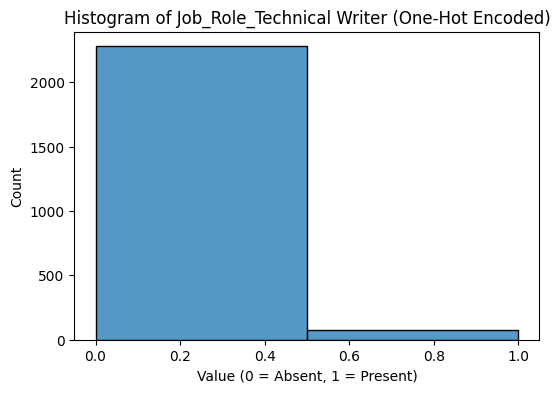

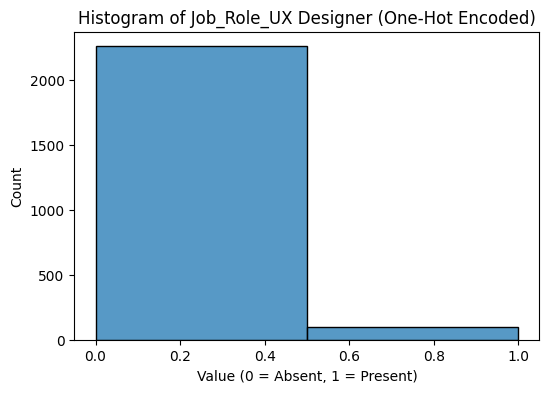

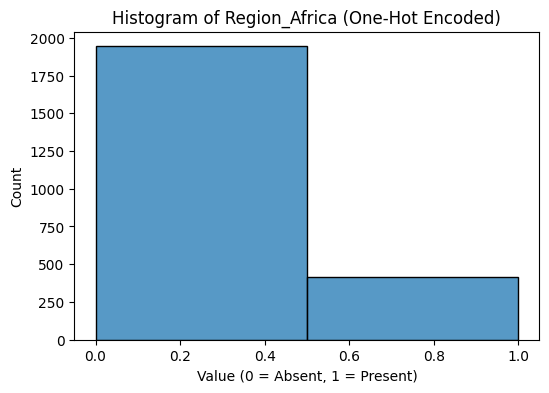

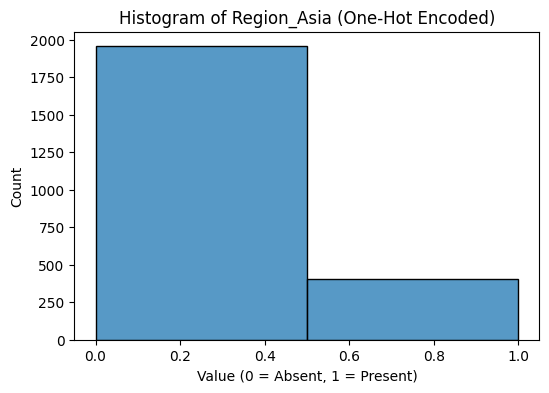

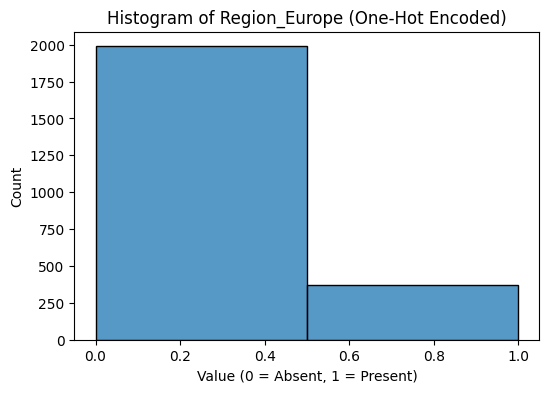

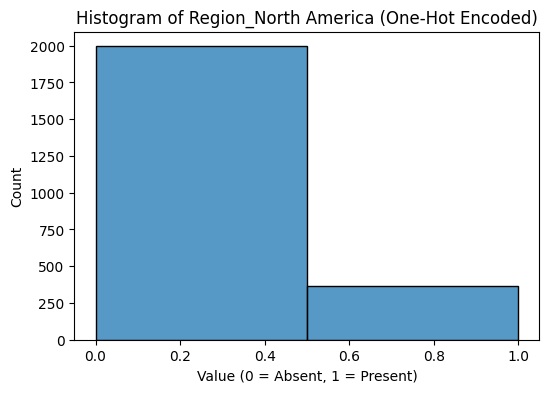

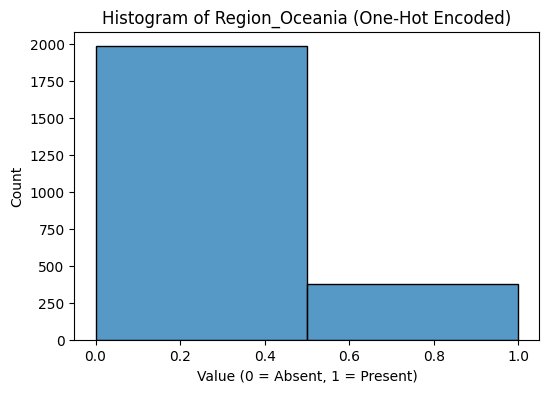

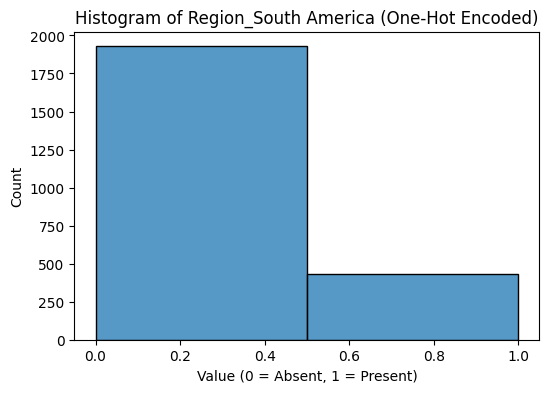

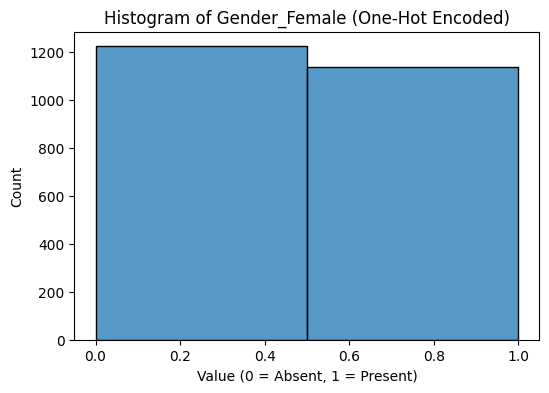

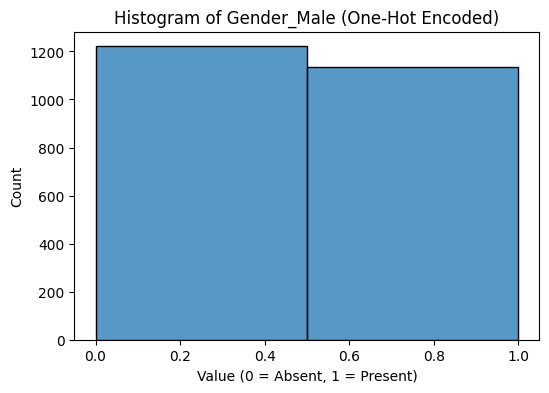

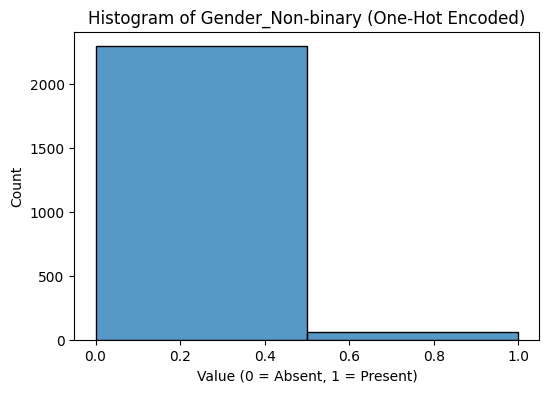

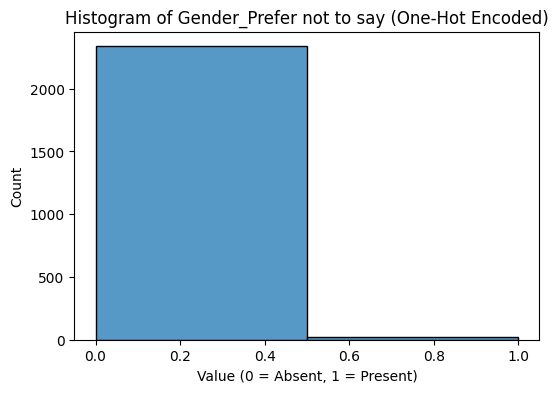

In [16]:
#One Hot Encoded Histograms
for col in onehot_feature_names:
    plt.figure(figsize=(6,4))
    sns.histplot(data_df[col], bins=2, kde=False)
    plt.title(f'Histogram of {col} (One-Hot Encoded)')
    plt.xlabel("Value (0 = Absent, 1 = Present)")
    plt.ylabel("Count")
    plt.show()

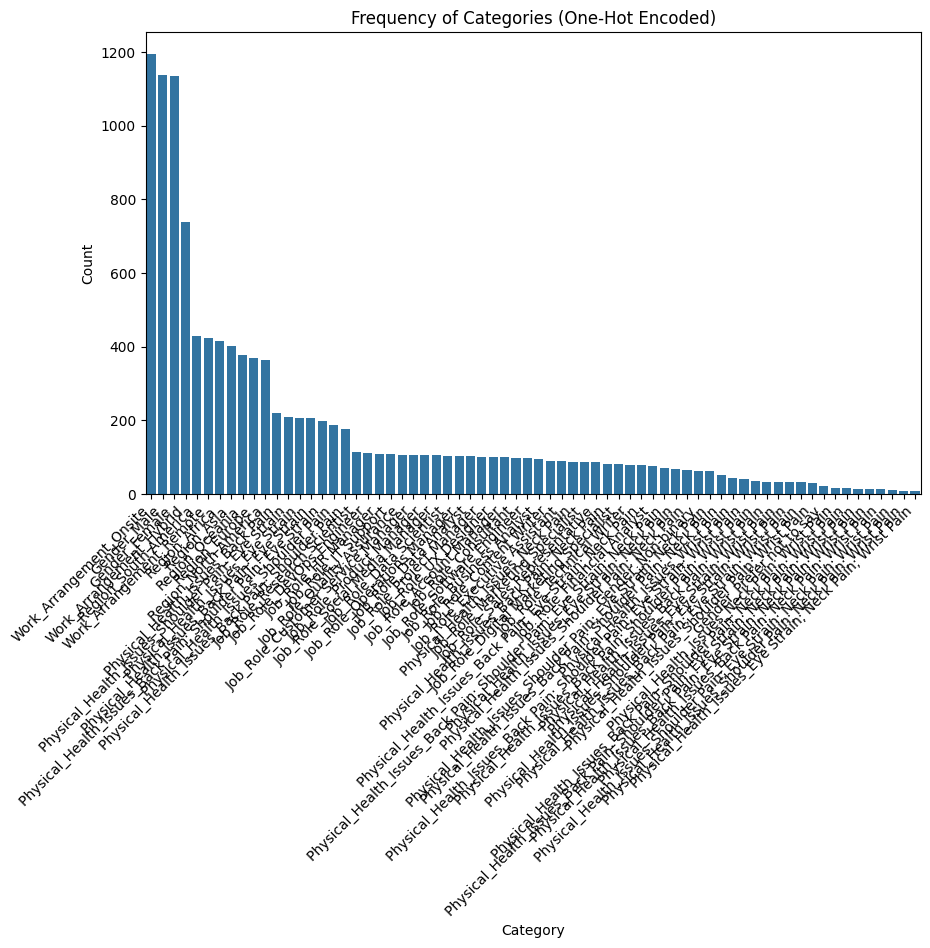

In [17]:
# Sum each one-hot column
category_counts = data_df[onehot_feature_names].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45, ha="right")
plt.title("Frequency of Categories (One-Hot Encoded)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

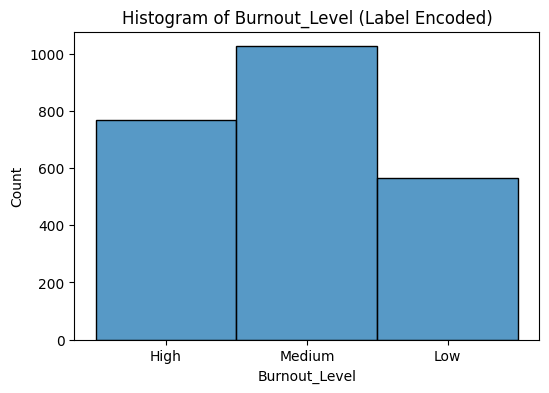

In [18]:
#Label Encoded Histogram
for col in label_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data_df[col], bins=len(data_df[col].unique()), kde=False)
    plt.title(f'Histogram of {col} (Label Encoded)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [19]:
data_df.to_csv('IT24102944.csv',index=False)